## DEMO LIFE

Analizamos una base de datos del estudio "SEVERE HYPOGLYCEMIA IN  OLDER ADULTS WITH TYPE 1 DIABETES, A Study to Identify Factors Associated  with the Occurrence of Severe Hypoglycemia in Older Adults with T1D" 
Recordemos que la hipoglicemia son niveles bajos de azúcar en sangre.

Empezamos a analizar una de las bases de datos del proyecto llamada "BDEmoLifeDiabHxMgmt".
Abordamos un problema de clasificación que nuestra salida será si es un paciente caso o control 
 - Caso. evento SH (Severe Hipoglucemia) en los últimos 12 meses
 - Control . NO SH en los últimos 3 años.

In [1]:
#importamos los módulos necesarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
#from sklearn.metrics import recall_specificity
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

In [2]:
#Cargamos la base de datos y la guardamos en un dataframe
data = pd.read_csv("database1.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
data.head(30) # Muestra las primeras 5 filas

,RecID,PtID,Gender,Ethnicity,Race,EduLevel,EduLevelNoAns,EduLevelUnk,AnnualInc,AnnualIncNoAns,...,MissInsulinDoseFreqUnk,OralMedMethod,GlucMonMethod,InjUseMethod,PumpUseMethod,HeadInjLostCons,HeadInjOcc,HeadInjOccUnk,Pacemaker,LastSHSeverity
0,9,199,F,Not Hispanic or Latino,White,Associate Degree,NaN,NaN,$25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,56,M,Not Hispanic or Latino,White,High school graduate/diploma/GED,NaN,NaN,$25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,201,M,Not Hispanic or Latino,White,Associate Degree,NaN,NaN,Less than $25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,107,M,Not Hispanic or Latino,White,High school graduate/diploma/GED,NaN,NaN,$50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,47,M,Not Hispanic or Latino,White,High school graduate/diploma/GED,NaN,NaN,$25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,36,181,M,Not Hispanic or Latino,White,High school graduate/diploma/GED,NaN,NaN,$25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,35,53,M,Not Hispanic or Latino,White,Master's Degree,NaN,NaN,$100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,44,114,F,Not Hispanic or Latino,White,Associate Degree,NaN,NaN,$50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,59,95,F,Not Hispanic or Latino,White,Some college but no degree,NaN,NaN,$25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,74,136,F,Not Hispanic or Latino,White,High school graduate/diploma/GED,NaN,NaN,$25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(201, 127)

In [4]:
!pip install missingno

In [4]:
# graficamos los valores nulos
import missingno as msno

msno.bar(data)
plt.savefig("{h}.pdf")
plt.close()

Abrimos el archivo BPtRoster dónde aparecen si los pacientes son caso o control.
A continuación, utilizamos merge para unir los datos de ambos ficheros. 


In [5]:
#Cargamos la base de datos y la guardamos en un dataframe
roster = pd.read_csv("BPtRoster.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
roster.head() # Muestra las primeras 5 filas


,RecID,PtID,BCaseControlStatus
0,6,199,Case
1,8,194,Case
2,9,56,Control
3,10,201,Case
4,11,107,Control


In [6]:
data1 = pd.merge(roster,data, on = "PtID")

Debido a la alta cantidad de valores nulos, decidimos realizar nuestro análisis con las siguientes características

In [8]:
data = data1[["Gender", "Ethnicity", "Race", "EduLevel", "AnnualInc", "BCaseControlStatus"]]

## Valores nulos

Reemplazamos los valores nulos por la moda

In [14]:
data.isnull().sum()

Gender                0
Ethnicity             0
Race                  0
EduLevel              0
AnnualInc             0
BCaseControlStatus    0
dtype: int64

In [15]:
df_nonnan_AnnualInc = data["AnnualInc"].dropna()
df_nonnan_EduLevel = data["EduLevel"].dropna()

In [16]:
from scipy.stats import stats
mode_AnnualInc = stats.mode(df_nonnan_AnnualInc.values)[0][0]
mode_LgSnackBed = stats.mode(df_nonnan_EduLevel.values)[0][0]

In [17]:
data["AnnualInc"].fillna(mode_AnnualInc, inplace = True) 
data["EduLevel"].fillna(mode_LgSnackBed, inplace = True) 

In [18]:
data.isnull().sum()

Gender                0
Ethnicity             0
Race                  0
EduLevel              0
AnnualInc             0
BCaseControlStatus    0
dtype: int64

# Representación

Cambiamos los diferentes nombres de las variables y realizamos un análisis exploratorio

In [19]:
data1.replace({"AnnualInc": "Less than $25"}, "> $25", inplace = True)


In [20]:
data1.replace({"EduLevel": "High school graduate/diploma/GED"}, "G/D/GED", inplace = True)
data1.replace({"EduLevel": "Bachelor's Degree"}, "BD", inplace = True)
data1.replace({"EduLevel": "Some college but no degree"}, "C/ND", inplace = True)
data1.replace({"EduLevel": "High school graduate/diploma/GED"}, "HS/D/GED", inplace = True)
data1.replace({"EduLevel": "Master's Degree"}, "MD", inplace = True)
data1.replace({"EduLevel": "Associate Degree"}, "AD", inplace = True)
data1.replace({"EduLevel": "Professional Degree"}, "PD", inplace = True)
data1.replace({"EduLevel": "Doctorate Degree"}, "DD", inplace = True)
data1.replace({"EduLevel": "12th Grade - no diploma"}, "ND", inplace = True)
data1.replace({"EduLevel": "11th Grade"}, "11G", inplace = True)
data1.replace({"EduLevel": "7th or 8th Grade"}, "7/8G", inplace = True)


In [21]:
data1.replace({"Race": "White"}, "W", inplace = True)
data1.replace({"Race": "Asian"}, "A", inplace = True)
data1.replace({"Race": "Black/African American"}, "B/AM", inplace = True)
data1.replace({"Race": "Native Hawaiian/Other Pacific Islanderee"}, "College", inplace = True)
data1.replace({"Race": "American Indian/Alaskan Native"}, "AI/ AN", inplace = True)
data1.replace({"Race": "Unknown/not reported"}, "UNK", inplace = True)

In [22]:
data1.replace({"Ethnicity": "Hispanic or Latino"}, "H/L", inplace = True)
data1.replace({"Ethnicity": "Not Hispanic or Latino"}, "NH/NL", inplace = True)
data1.replace({"Ethnicity": "Unknown/not reported"}, "UNK", inplace = True)

<AxesSubplot:title={'center':'Ingresos anuales'}>

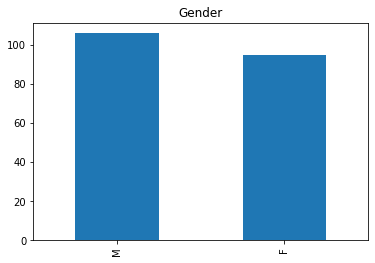

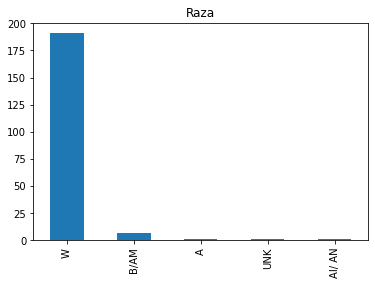

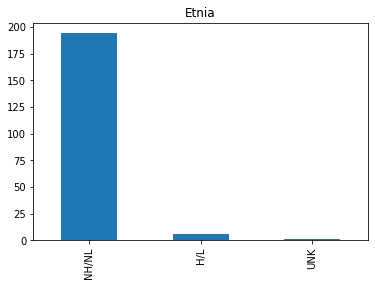

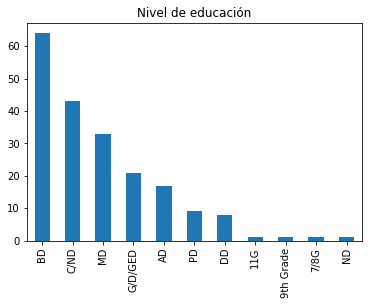

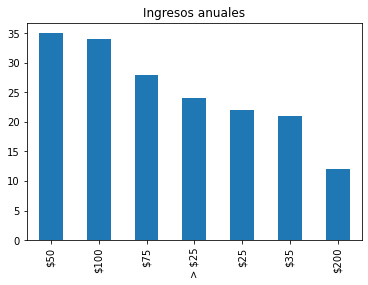

In [23]:
# Gráfico de barras para las variables categóricas
plt.subplots()
data['Gender'].value_counts().plot.bar(title="Gender")
plt.subplots()
data1['Race'].value_counts().plot.bar(title="Raza")
plt.subplots()
data1['Ethnicity'].value_counts().plot.bar(title="Etnia")
plt.subplots()
data1['EduLevel'].value_counts().plot.bar(title="Nivel de educación")
plt.subplots()
data1['AnnualInc'].value_counts().plot.bar(title="Ingresos anuales")

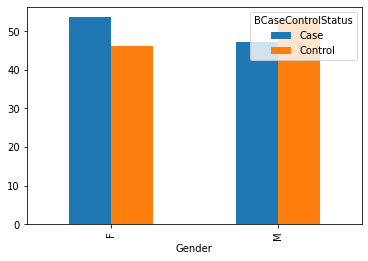

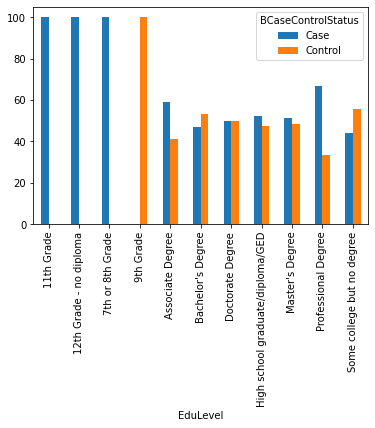

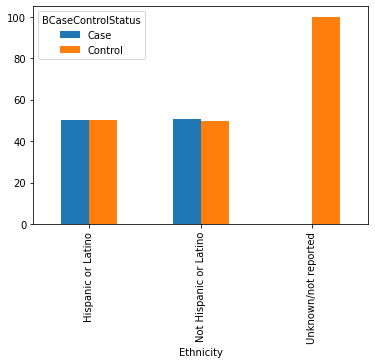

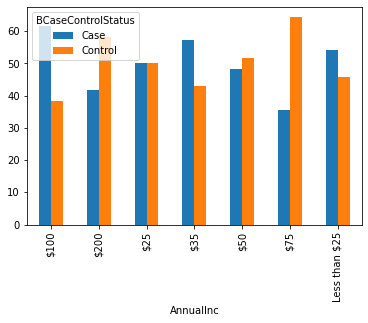

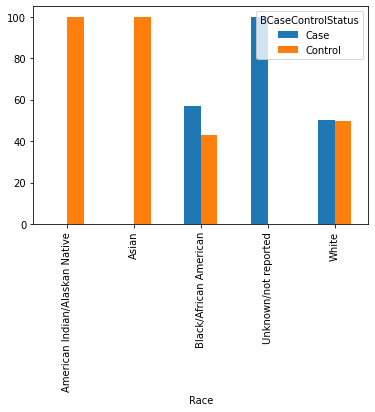

In [24]:
# Gráfico de barras segun clase
plot = pd.crosstab(index=data['Gender'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['EduLevel'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['Ethnicity'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras segun clase
plot = pd.crosstab(index=data['AnnualInc'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barrassegun clase
plot = pd.crosstab(index=data['Race'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [25]:
data.replace({"Race" : "American Indian/Alaskan Native"}, "American/ Alaskan", inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [26]:
#list_num_features=['HighBGLevTakeAction','LowBGLevTakeAction','PtCurrA1cGoal']
list_cat_features=['Race','AnnualInc','Ethnicity', "EduLevel", "Gender"]

In [27]:
from collections import Counter
def get_unique_categories_and_probs(x, n_samples, flag_normalize):
    counter_samples = Counter(x)
    dict_counter_samples = dict(counter_samples)

    x_unique = np.array(list(dict_counter_samples.keys()))
    counts_categories = np.array(list(dict_counter_samples.values()))

    y_pos = np.arange(len(x_unique))

    if flag_normalize:
        probs = np.array(counts_categories) / n_samples
    else:
        probs = np.array(counts_categories)

    return x_unique, probs, y_pos

In [28]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
n_samples=data1.shape[0]
flag_normalize=True
width=0.35
for column_name in list_cat_features:
    high=data1[data1.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
    high2=data1[data1.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  # plt.hist([high, high2], bins=80, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  # plt.show()
    x_unique1, probs1, y_pos1 = get_unique_categories_and_probs(high, n_samples, flag_normalize)
    x_unique2, probs2, y_pos2 = get_unique_categories_and_probs(high2, n_samples, flag_normalize)
    plt.bar(y_pos1 - width/2, probs1, width, label='class1', color='#0070FF')
    plt.bar(y_pos2 + width/2, probs2, width, label='class2', color='#FF8E07')
    plt.xticks(y_pos2, x_unique2, rotation=90, fontsize = 16)
    plt.yticks(fontsize = 16)
  # plt.set_xticklabels([fmt_cat(i) for i in x_unique1], rotation='vertical')
    plt.tight_layout()
    plt.savefig("{}.pdf".format(column_name))
    plt.close()

In [29]:
data_input = data.drop(['BCaseControlStatus'], axis=1) 
data_output_borrar = data1["BCaseControlStatus"]

data_output = data_output_borrar.replace("Case",1).replace("Control",0)

### One hot Encoding

##### Quitar variables.
Para obtener menos variables y así que nuestro algoritmo aprenda mejor realizaremos los siguientes ajustes:
* La variable "Gender" la cambiaremos a binaria.
* La variable "Race"crearemos una nueva clase llamada "Other" donde agruparemos a todos los sujetos que no sean de raza blanca. 
* La variable " Ethnicity" hay un sujeto que es desconocido, por lo que lo pondremos en la clase mayoritaria.

In [30]:
data["Gender"] = data["Gender"].replace(["F", "M"],[0, 1])

<ipython-input-30-33557689863b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Gender"] = data["Gender"].replace(["F", "M"],[0, 1])


In [31]:
data["Race"] = data["Race"].replace(["Asian", "American/ Alaskan", "American Indian/Alaskan Native", "Unknown/not reported", "Black/African American"],["Other","Other","Other", "Other", "Other"])
data["Race"] = data["Race"].replace(["White", "Other"],[0, 1])

<ipython-input-31-bd7be6bc14b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Race"] = data["Race"].replace(["Asian", "American/ Alaskan", "American Indian/Alaskan Native", "Unknown/not reported", "Black/African American"],["Other","Other","Other", "Other", "Other"])
<ipython-input-31-bd7be6bc14b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Race"] = data["Race"].replace(["White", "Other"],[0, 1])


In [32]:
data["Ethnicity"] = data["Ethnicity"].replace(["Unknown/not reported", "Hispanic or Latino"],["Other", "Other"])
data["Ethnicity"] = data["Ethnicity"].replace(["Not Hispanic or Latino", "Other"],[0, 1])

<ipython-input-32-0e076c577677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Ethnicity"] = data["Ethnicity"].replace(["Unknown/not reported", "Hispanic or Latino"],["Other", "Other"])
<ipython-input-32-0e076c577677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Ethnicity"] = data["Ethnicity"].replace(["Not Hispanic or Latino", "Other"],[0, 1])


In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [34]:
enc_data = pd.DataFrame(enc.fit_transform(data[['EduLevel']]).toarray())
data['EduLevel'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data.EduLevel, prefix='EduLevel')
data = pd.concat([data,pd.get_dummies(data['EduLevel'], prefix='EduLevel')],axis=1)

In [35]:
enc_data = pd.DataFrame(enc.fit_transform(data[['AnnualInc']]).toarray())
data['AnnualInc'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data.AnnualInc, prefix='AnnualInc')
data = pd.concat([data,pd.get_dummies(data['AnnualInc'], prefix='AnnualInc')],axis=1)

In [36]:
data.drop(["EduLevel", "AnnualInc"], axis = 1, inplace = True)

In [37]:
data

,Gender,Ethnicity,Race,BCaseControlStatus,EduLevel_11th Grade,EduLevel_12th Grade - no diploma,EduLevel_7th or 8th Grade,EduLevel_9th Grade,EduLevel_Associate Degree,EduLevel_Bachelor's Degree,...,EduLevel_Master's Degree,EduLevel_Professional Degree,EduLevel_Some college but no degree,AnnualInc_$100,AnnualInc_$200,AnnualInc_$25,AnnualInc_$35,AnnualInc_$50,AnnualInc_$75,AnnualInc_Less than $25
0,0,0,0,Case,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,Control,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,Case,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,Control,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,Case,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,0,1,Case,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
197,0,0,0,Control,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
198,1,0,0,Control,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
199,1,0,0,Control,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [41]:
pd.unique(data_input["Race"])

data_input["Race"] = data_input["Race"].replace(["American/ Alaskan"],[1])

In [42]:
pd.unique(data_input["Race"])

array([0, 1], dtype=int64)

In [38]:
data_input = data.drop(['BCaseControlStatus'], axis=1) 
data_output_borrar = data1["BCaseControlStatus"]

data_output = data_output_borrar.replace("Case",1).replace("Control",0)

# Modelos de ML

In [39]:
model   =[]
mean = []
std = []

model2   =[]
mean2 = []
std2 = []

# KNN

In [40]:
def knn (X_train,X_test,Y_train,Y_test,seed):
    param_grid = {'n_neighbors': range(1,50,2)}
    k_grid = np.array(range(1,50,2))
    grid_knn = GridSearchCV(KNeighborsClassifier(metric = 'hamming'), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)

    grid_knn.fit(X_train, Y_train) 
      #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
    auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])

    plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
    plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
    plt.xlabel('k',fontsize=14)
    plt.ylabel('roc_auc',fontsize=14)
    plt.legend()
    plt.show()
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
    print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))
      # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol

    grid_knn.get_params()
      # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test

    kNN_clasif_all = grid_knn.best_estimator_
    modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)
    y_output_knn2 = modelo_knn_clasif2.predict(X_test)
    print(accuracy_score(Y_test, y_output_knn2))
    print(confusion_matrix(Y_test, y_output_knn2))
    Sensibilidad= recall_score(Y_test, y_output_knn2)
    Accuracy = accuracy_score(Y_test, y_output_knn2)
    Recall= recall_score(Y_test, y_output_knn2)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
    Especificidad = tn / (tn + fp)

    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Recall, Especificidad)

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
26        1          0     0                    0   
1         1          0     0                    0   
162       0          0     0                    0   
25        1          0     0                    0   
94        0          0     0                    0   
..      ...        ...   ...                  ...   
53        0          0     0                    0   
115       1          0     0                    0   
178       0          0     0                    0   
99        0          0     0                    0   
119       0          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
26                                  0                          0   
1                                   0                          0   
162                                 0                          0   
25                                  0                      

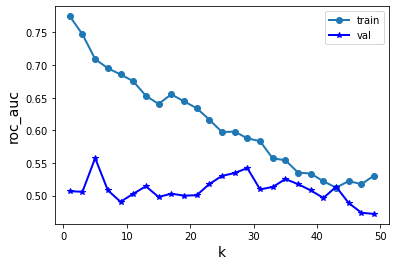

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.557
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.36585365853658536
[[ 5 15]
 [11 10]]
Sensibilidad y Accuracy 0.47619047619047616 0.36585365853658536


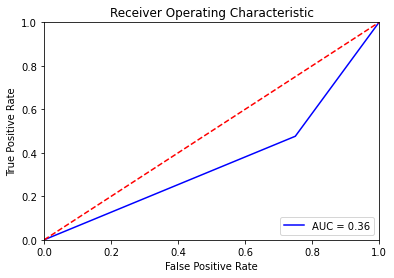

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
150       0          0     0                    0   
197       0          0     0                    0   
58        1          0     0                    0   
161       0          0     0                    0   
86        1          0     0                    0   
..      ...        ...   ...                  ...   
107       0          0     0                    0   
49        0          0     0                    0   
114       1          0     0                    0   
128       1          1     0                    0   
50        1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
150                                 0                          0   
197                                 0                          0   
58                                  0                          0   
161                                 0                      

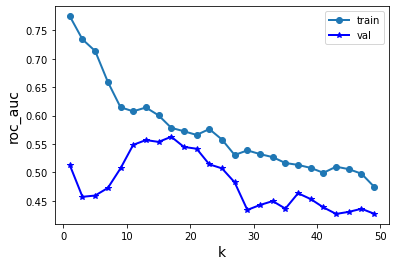

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.563
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.4634146341463415
[[ 8 12]
 [10 11]]
Sensibilidad y Accuracy 0.5238095238095238 0.4634146341463415


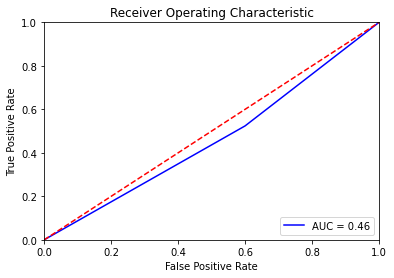

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
131       0          0     0                    0   
30        0          0     0                    0   
168       0          0     0                    0   
154       1          0     0                    0   
28        1          0     0                    0   
..      ...        ...   ...                  ...   
46        1          0     0                    0   
5         1          0     0                    0   
58        1          0     0                    0   
151       1          0     0                    0   
183       1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
131                                 0                          0   
30                                  0                          0   
168                                 0                          0   
154                                 0                      

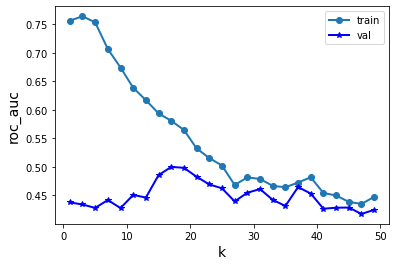

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.5609756097560976
[[10 10]
 [ 8 13]]
Sensibilidad y Accuracy 0.6190476190476191 0.5609756097560976


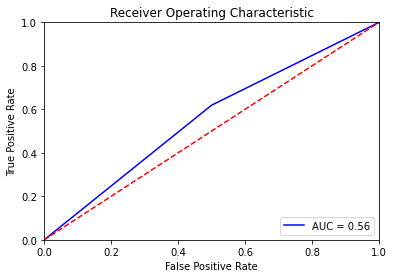

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
77        0          0     0                    0   
147       0          0     0                    0   
51        0          0     0                    0   
157       0          0     0                    0   
65        1          0     0                    0   
..      ...        ...   ...                  ...   
74        0          0     1                    0   
120       0          0     0                    0   
191       1          0     0                    0   
164       0          0     0                    0   
57        1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
77                                  0                          0   
147                                 0                          0   
51                                  0                          0   
157                                 0                      

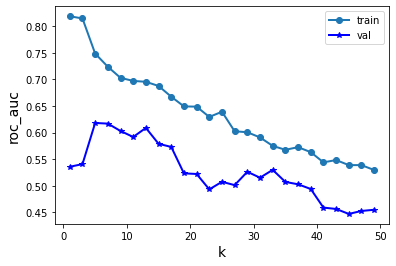

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.36585365853658536
[[ 7 13]
 [13  8]]
Sensibilidad y Accuracy 0.38095238095238093 0.36585365853658536


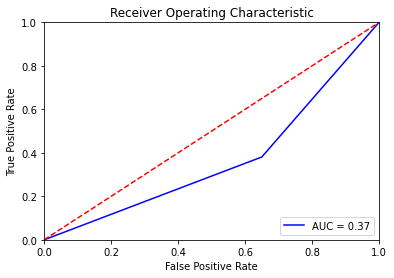

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
54        0          0     0                    0   
28        1          0     0                    0   
25        1          0     0                    0   
21        1          0     0                    0   
24        0          0     0                    0   
..      ...        ...   ...                  ...   
130       0          0     0                    0   
146       0          0     0                    0   
29        1          0     1                    0   
43        1          0     0                    0   
92        1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
54                                  0                          0   
28                                  0                          0   
25                                  0                          0   
21                                  0                      

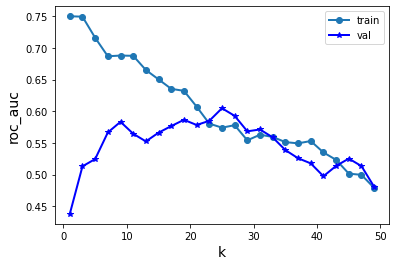

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.605
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}
0.4634146341463415
[[10 10]
 [12  9]]
Sensibilidad y Accuracy 0.42857142857142855 0.4634146341463415


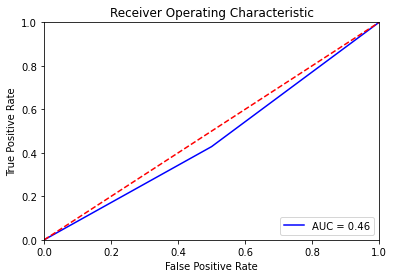

In [43]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
recall = []
espe =[]

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    print(X_train)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)


    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
   # scaler_mlp = StandardScaler().fit(X_train)
    #X_train_mlp_norm = scaler_mlp.transform(X_train)
    #X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train,  X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    recall.append(b[3])
    espe.append(b[4])

In [44]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...


model.append("KNN")
mean.append(media_knn)
std.append(desviacion_estandar_knn)
print(media_knn, desviacion_estandar_knn)

media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.44390243902439025 0.08162536844234886
0.4 0.10606601717798213


In [45]:
media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)

0.44285714285714284 0.08182737900390387


In [46]:
media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

media_knn4 = statistics.mean(recall) # 7
desviacion_estandar_knn4 = statistics.stdev(recall) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.4857142857142857 0.09159706696033976
0.4857142857142857 0.09159706696033976


# SVC

In [48]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


#from sklearn.metrics import recall_specificity 
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo')
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    Especificidad = tn / (tn + fp)


    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))

#    Specificity= recall_specificity(Y_test, y_output_svc)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    Recall= recall_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy", Accuracy)

    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return ( Accuracy, roc_auc, Recall, Especificidad)

(160, 21) (160,) (41, 21) (41,)
Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.492
0.43902439024390244
[[ 0 20]
 [ 3 18]]
Sensibilidad y Accuracy 0.43902439024390244


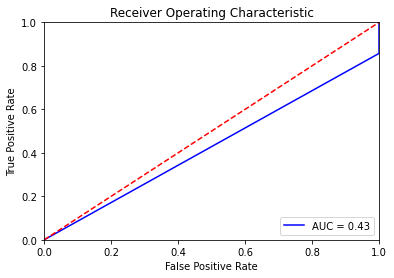

(160, 21) (160,) (41, 21) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.476
0.4634146341463415
[[ 6 14]
 [ 8 13]]
Sensibilidad y Accuracy 0.4634146341463415


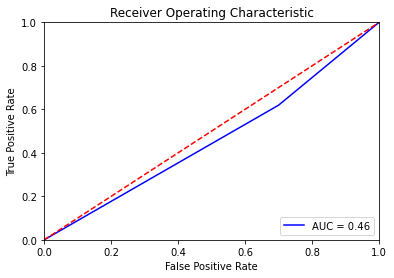

(160, 21) (160,) (41, 21) (41,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.381
0.5365853658536586
[[11  9]
 [10 11]]
Sensibilidad y Accuracy 0.5365853658536586


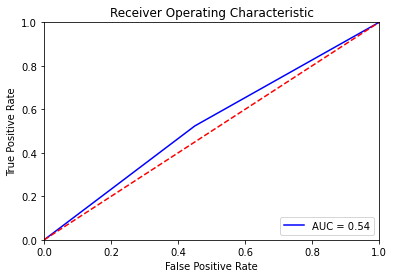

(160, 21) (160,) (41, 21) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.577
0.4878048780487805
[[ 2 18]
 [ 3 18]]
Sensibilidad y Accuracy 0.4878048780487805


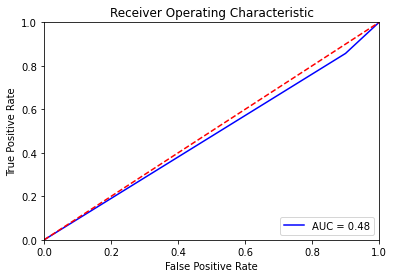

(160, 21) (160,) (41, 21) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.573
0.4634146341463415
[[ 9 11]
 [11 10]]
Sensibilidad y Accuracy 0.4634146341463415


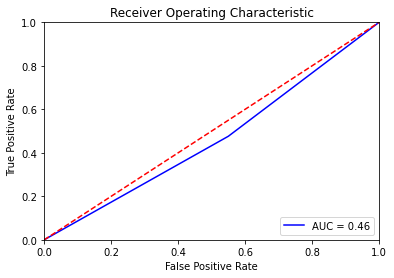

[] [0.43902439024390244, 0.4634146341463415, 0.5365853658536586, 0.4878048780487805, 0.4634146341463415] [0.42857142857142855, 0.45952380952380956, 0.5369047619047619, 0.47857142857142854, 0.4630952380952381]


In [49]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
recall = []
especificidad = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    #scaler_mlp = StandardScaler().fit(X_train)
   # X_train_mlp_norm = scaler_mlp.transform(X_train)
    #X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train , X_test, Y_train, Y_test, i)
   # sensi.append(b[0])
    accuracy.append(b[0])
    roc.append(b[1])
    recall.append(b[2])
    especificidad.append(b[3])



print(sensi, accuracy, roc)

In [50]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model.append("SVM")
mean.append(media_svc)
std.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2.append("SVM")
mean2.append(media_svc2)
std2.append(desviacion_estandar_svc2)


media_knn4 = statistics.mean(recall) # 7
desviacion_estandar_knn4 = statistics.stdev(recall) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

media_knn5 = statistics.mean(especificidad) # 7
desviacion_estandar_knn5 = statistics.stdev(especificidad) # 5.164...

print(media_knn5, desviacion_estandar_knn5)


0.4780487804878049 0.036989636312446596
0.47333333333333333 0.03989960473550942
0.6666666666666666 0.1813279310919978
0.28 0.23075961518428653


## DecisionTree

In [51]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_std_all_train, X_std_all_test, Y_train, Y_test,seed):
    
    #std_all = preprocessing.StandardScaler().fit(X_train) #Extraemos las características y hacemos la estadndarización
    #X_std_all_train = std_all.transform(X_train) #tiene las 8 características estandarizadas
    #X_std_all_test = std_all.transform(X_test)
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,9)}
    profundidad_grid = np.array(range(1,9))

    print(X_std_all_train)
  #  X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_std_all_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    
    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    print(grid_arbol_clasif.get_params())


    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_std_all_train, Y_train)

    y_output_arbol = modelo_arbol_clasif.predict(X_std_all_test)
    print(accuracy_score(Y_test, y_output_arbol))
    print(confusion_matrix(Y_test, y_output_arbol))

    Sensibilidad= recall_score(Y_test, y_output_arbol)
    Accuracy = accuracy_score(Y_test, y_output_arbol)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
    Especificidad = tn / (tn + fp)

    
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)




(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
26        1          0     0                    0   
1         1          0     0                    0   
162       0          0     0                    0   
25        1          0     0                    0   
94        0          0     0                    0   
..      ...        ...   ...                  ...   
53        0          0     0                    0   
115       1          0     0                    0   
178       0          0     0                    0   
99        0          0     0                    0   
119       0          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
26                                  0                          0   
1                                   0                          0   
162                                 0                          0   
25                                  0                      

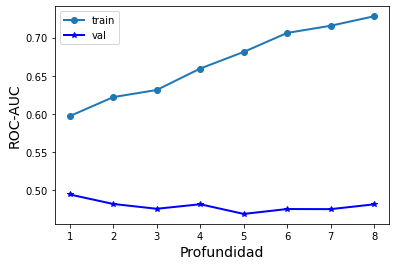

Mejor ROC-AUC en validación cruzada: 0.494
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4634146341463415
[[ 1 19]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.4634146341463415


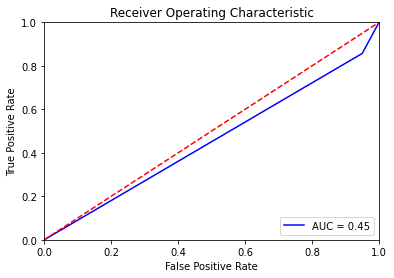

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
150       0          0     0                    0   
197       0          0     0                    0   
58        1          0     0                    0   
161       0          0     0                    0   
86        1          0     0                    0   
..      ...        ...   ...                  ...   
107       0          0     0                    0   
49        0          0     0                    0   
114       1          0     0                    0   
128       1          1     0                    0   
50        1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
150                                 0                          0   
197                                 0                          0   
58                                  0                          0   
161                                 0                      

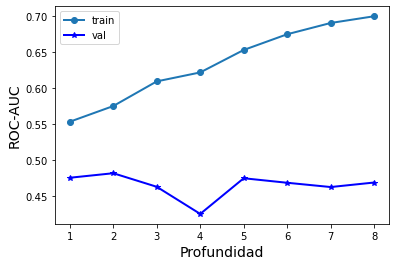

Mejor ROC-AUC en validación cruzada: 0.481
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5365853658536586
[[ 1 19]
 [ 0 21]]
Sensibilidad y Accuracy 1.0 0.5365853658536586


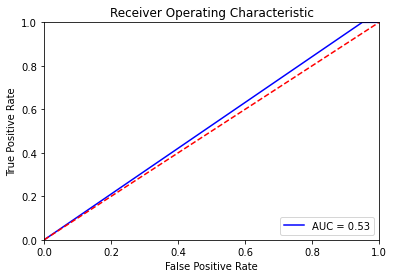

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
131       0          0     0                    0   
30        0          0     0                    0   
168       0          0     0                    0   
154       1          0     0                    0   
28        1          0     0                    0   
..      ...        ...   ...                  ...   
46        1          0     0                    0   
5         1          0     0                    0   
58        1          0     0                    0   
151       1          0     0                    0   
183       1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
131                                 0                          0   
30                                  0                          0   
168                                 0                          0   
154                                 0                      

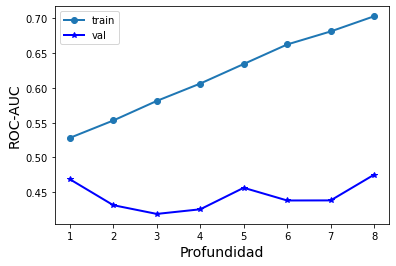

Mejor ROC-AUC en validación cruzada: 0.475
Mejor valor del hiperparámetro: {'max_depth': 8}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5365853658536586
[[18  2]
 [17  4]]
Sensibilidad y Accuracy 0.19047619047619047 0.5365853658536586


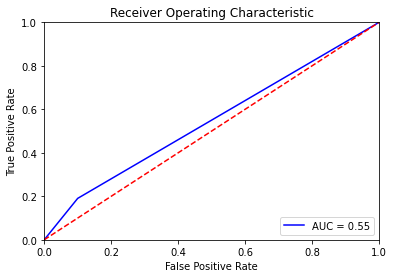

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
77        0          0     0                    0   
147       0          0     0                    0   
51        0          0     0                    0   
157       0          0     0                    0   
65        1          0     0                    0   
..      ...        ...   ...                  ...   
74        0          0     1                    0   
120       0          0     0                    0   
191       1          0     0                    0   
164       0          0     0                    0   
57        1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
77                                  0                          0   
147                                 0                          0   
51                                  0                          0   
157                                 0                      

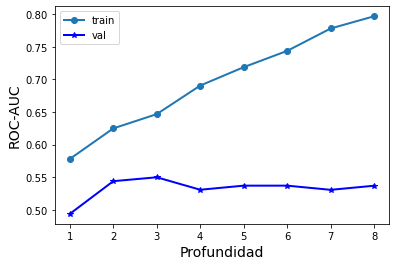

Mejor ROC-AUC en validación cruzada: 0.550
Mejor valor del hiperparámetro: {'max_depth': 3}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.3902439024390244
[[ 2 18]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.3902439024390244


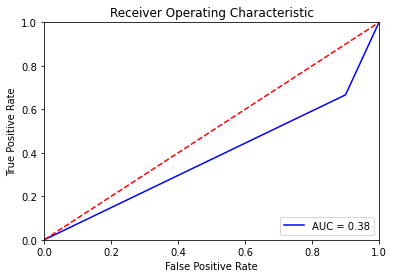

(160, 21) (160,) (41, 21) (41,)
     Gender  Ethnicity  Race  EduLevel_11th Grade  \
54        0          0     0                    0   
28        1          0     0                    0   
25        1          0     0                    0   
21        1          0     0                    0   
24        0          0     0                    0   
..      ...        ...   ...                  ...   
130       0          0     0                    0   
146       0          0     0                    0   
29        1          0     1                    0   
43        1          0     0                    0   
92        1          0     0                    0   

     EduLevel_12th Grade - no diploma  EduLevel_7th or 8th Grade  \
54                                  0                          0   
28                                  0                          0   
25                                  0                          0   
21                                  0                      

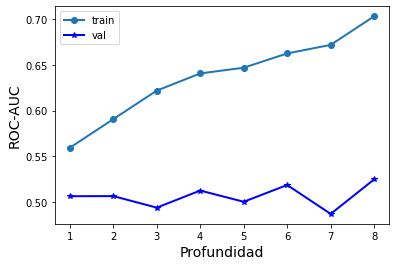

Mejor ROC-AUC en validación cruzada: 0.525
Mejor valor del hiperparámetro: {'max_depth': 8}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.43902439024390244
[[ 2 18]
 [ 5 16]]
Sensibilidad y Accuracy 0.7619047619047619 0.43902439024390244


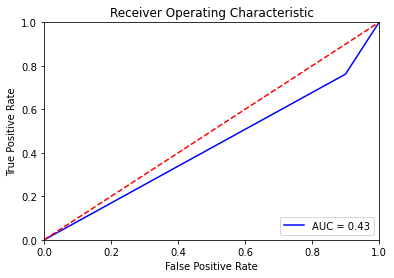

[0.8571428571428571, 1.0, 0.19047619047619047, 0.6666666666666666, 0.7619047619047619] [0.4634146341463415, 0.5365853658536586, 0.5365853658536586, 0.3902439024390244, 0.43902439024390244] [0.45357142857142857, 0.525, 0.5452380952380952, 0.3833333333333333, 0.4309523809523809]


In [52]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
especificidad = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [53]:
media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...


model2.append("DT")
mean2.append(media_log)
std2.append(desviacion_estandar_log)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.24000000000000002 0.36979724174201195


In [54]:
print(media_log, desviacion_estandar_log)

0.4676190476190476 0.06701334181981533


In [55]:

media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...


model.append("DT")
mean.append(media_sen_logarit)
std.append(desviacion_estandar_sen_logarit)
print(media_sen_logarit, desviacion_estandar_sen_logarit)

0.4731707317073171 0.06360197468490389


In [56]:
media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

0.6952380952380952 0.30787104524275455


# Regresión Logística Lasso

In [57]:
def reg_Lasso(X_train_norm, X_test_norm, Y_train, Y_test):
              

    #scaler = StandardScaler() #normalizamos
    #scalerfit =  scaler.fit(X_train) #fit con los datos de train
    #X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    #X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 
              
    from sklearn.linear_model import Lasso

    lasso = Lasso()

    logreg=LogisticRegression(solver='liblinear', penalty='l1')
    # Valores de alpha
    parameters = {"C":[1e-4, 1e-2, 1, 5, 10, 20]}

    # Grid search para lasso regression
    lasso_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

    # Entrenamos
    lasso_train=lasso_regression.fit(X_train_norm, Y_train)

    print(lasso_regression.best_params_)
    print(lasso_regression.best_score_)

    # Obtenemos la salida predicha
    y_pred_lasso = lasso_regression.predict(X_test_norm)
#  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lasso)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')
    Especificidad = tn / (tn + fp)
    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lasso)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lasso, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lasso)
    print(f'Sensibilidad: {Sensibilidad}')
    #accuracy.append(Accuracy)
    #sensibilidad.append(Sensibilidad)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lasso)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 21) (160,) (41, 21) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


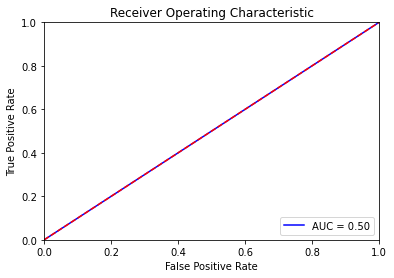

(160, 21) (160,) (41, 21) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


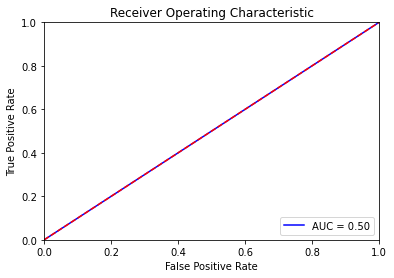

(160, 21) (160,) (41, 21) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


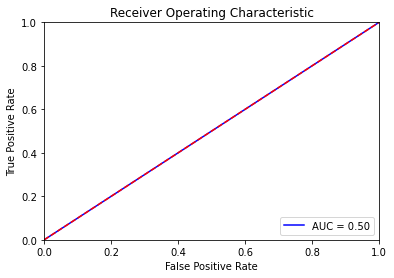

(160, 21) (160,) (41, 21) (41,)
{'C': 5}
0.525
[[ 8 12]
 [12  9]]
tn: 8, fp:12, fn:12, tp:9
Accuracy: 0.4146341463414634
              precision    recall  f1-score   support

Non-diabetic       0.40      0.40      0.40        20
    Diabetic       0.43      0.43      0.43        21

    accuracy                           0.41        41
   macro avg       0.41      0.41      0.41        41
weighted avg       0.41      0.41      0.41        41

Sensibilidad: 0.42857142857142855


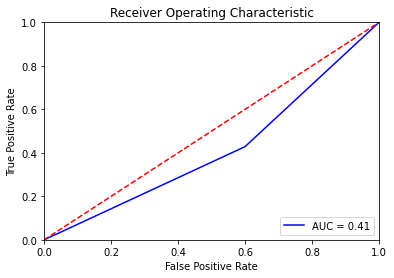

(160, 21) (160,) (41, 21) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


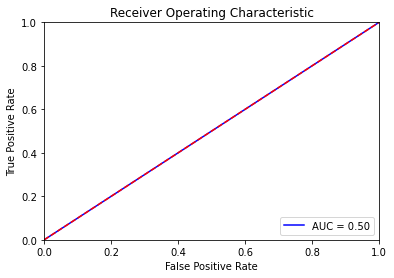

[0.0, 0.0, 0.0, 0.42857142857142855, 0.0] [0.4878048780487805, 0.4878048780487805, 0.4878048780487805, 0.4146341463414634, 0.4878048780487805] [0.5, 0.5, 0.5, 0.4142857142857143, 0.5]


In [58]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
especificidad = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    especificidad.append(b[3])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [59]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model.append("LASSO")
mean.append(media_lasso)
std.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2.append("LASSO")
mean2.append(media_lasso2)
std2.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)

media_knn4 = statistics.mean(especificidad) # 7
desviacion_estandar_knn4 = statistics.stdev(especificidad) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.47317073170731705 0.03272294601219205
0.4828571428571429 0.03833259389999638
0.08571428571428572 0.191662969499982
0.88 0.2683281572999748


In [60]:
def plot_mean_std_metric(df_metrics, lims, metric_name='', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [61]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model
df_metrics["mean"] = mean
df_metrics["std"] = std

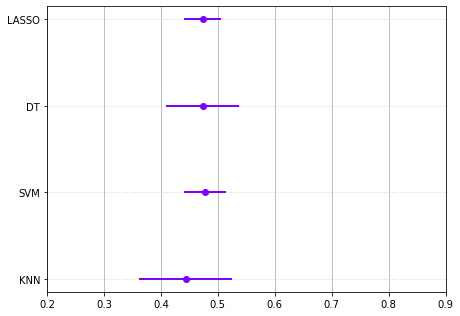

In [62]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='', flag_save_figure=True)


In [63]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2
df_metrics2["mean"] = mean2
df_metrics2["std"] = std2

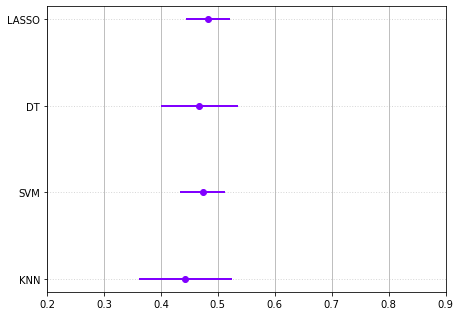

In [64]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)

# Feature Selection ExtraTreesClassifier

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

def extraTree(X_train, X_test, Y_train, Y_test):
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    # Como en árboles, no es necesario que las características estén normalizadas
    # Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Muestra el ranking en el ordenamiento
    print("Ranking de Características:")

    for f in range(X_train.shape[1]):
        print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Importancia de las características")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    return indices[0:5]

(160, 21) (160,) (41, 21) (41,)
Ranking de Características:
1. Característica 0 (0.139521)
2. Característica 8 (0.082845)
3. Característica 19 (0.073383)
4. Característica 1 (0.064187)
5. Característica 2 (0.057974)
6. Característica 13 (0.057130)
7. Característica 11 (0.055843)
8. Característica 14 (0.054112)
9. Característica 18 (0.053126)
10. Característica 17 (0.052942)
11. Característica 7 (0.042120)
12. Característica 9 (0.041999)
13. Característica 20 (0.039365)
14. Característica 12 (0.038470)
15. Característica 10 (0.037812)
16. Característica 16 (0.033433)
17. Característica 15 (0.026308)
18. Característica 6 (0.019104)
19. Característica 4 (0.013220)
20. Característica 5 (0.008774)
21. Característica 3 (0.008330)


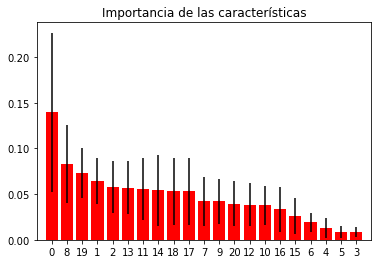

(160, 21) (160,) (41, 21) (41,)
Ranking de Características:
1. Característica 0 (0.176563)
2. Característica 2 (0.078439)
3. Característica 8 (0.076634)
4. Característica 1 (0.063003)
5. Característica 19 (0.058886)
6. Característica 18 (0.055327)
7. Característica 20 (0.054163)
8. Característica 14 (0.051294)
9. Característica 10 (0.050301)
10. Característica 13 (0.049724)
11. Característica 11 (0.049700)
12. Característica 7 (0.045298)
13. Característica 9 (0.037721)
14. Característica 16 (0.032970)
15. Característica 17 (0.032463)
16. Característica 12 (0.024808)
17. Característica 15 (0.018609)
18. Característica 3 (0.015765)
19. Característica 6 (0.015425)
20. Característica 4 (0.012906)
21. Característica 5 (0.000000)


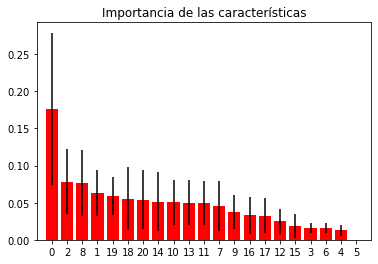

(160, 21) (160,) (41, 21) (41,)
Ranking de Características:
1. Característica 0 (0.209918)
2. Característica 8 (0.099523)
3. Característica 18 (0.074706)
4. Característica 14 (0.061031)
5. Característica 17 (0.056801)
6. Característica 20 (0.052340)
7. Característica 19 (0.047696)
8. Característica 10 (0.044781)
9. Característica 13 (0.043515)
10. Característica 1 (0.043435)
11. Característica 2 (0.042549)
12. Característica 7 (0.037399)
13. Característica 11 (0.034571)
14. Característica 16 (0.029229)
15. Característica 9 (0.026269)
16. Característica 15 (0.019613)
17. Característica 12 (0.019310)
18. Característica 3 (0.015020)
19. Característica 6 (0.014778)
20. Característica 4 (0.013870)
21. Característica 5 (0.013644)


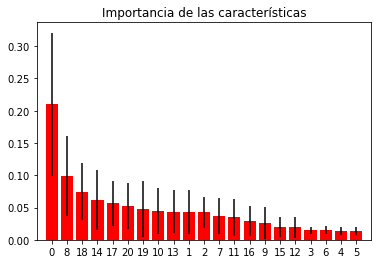

(160, 21) (160,) (41, 21) (41,)
Ranking de Características:
1. Característica 0 (0.192620)
2. Característica 8 (0.080270)
3. Característica 13 (0.072579)
4. Característica 19 (0.066049)
5. Característica 18 (0.064781)
6. Característica 17 (0.062332)
7. Característica 1 (0.060141)
8. Característica 14 (0.049073)
9. Característica 7 (0.044815)
10. Característica 11 (0.040569)
11. Característica 10 (0.038241)
12. Característica 20 (0.037495)
13. Característica 2 (0.036164)
14. Característica 9 (0.032517)
15. Característica 12 (0.029400)
16. Característica 15 (0.028205)
17. Característica 16 (0.027232)
18. Característica 6 (0.013996)
19. Característica 5 (0.008008)
20. Característica 3 (0.007874)
21. Característica 4 (0.007639)


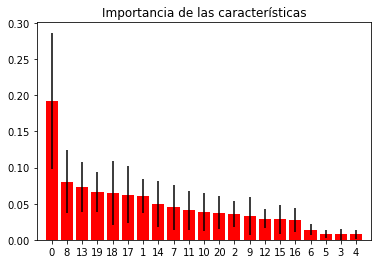

(160, 21) (160,) (41, 21) (41,)
Ranking de Características:
1. Característica 0 (0.210583)
2. Característica 8 (0.086176)
3. Característica 19 (0.063843)
4. Característica 13 (0.059884)
5. Característica 1 (0.054929)
6. Característica 17 (0.053788)
7. Característica 14 (0.050448)
8. Característica 18 (0.049611)
9. Característica 11 (0.048257)
10. Característica 2 (0.047521)
11. Característica 20 (0.045460)
12. Característica 10 (0.041905)
13. Característica 7 (0.038129)
14. Característica 12 (0.036212)
15. Característica 15 (0.033123)
16. Característica 9 (0.030404)
17. Característica 16 (0.024212)
18. Característica 3 (0.014704)
19. Característica 4 (0.010810)
20. Característica 6 (0.000000)
21. Característica 5 (0.000000)


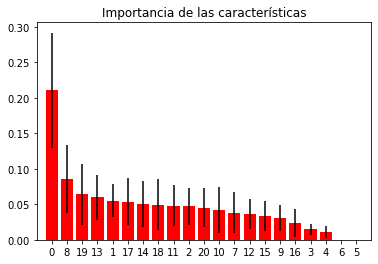

[array([ 0,  8, 19,  1,  2], dtype=int64), array([ 0,  2,  8,  1, 19], dtype=int64), array([ 0,  8, 18, 14, 17], dtype=int64), array([ 0,  8, 13, 19, 18], dtype=int64), array([ 0,  8, 19, 13,  1], dtype=int64)]


In [66]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = extraTree(X_train, X_test, Y_train, Y_test)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

#  Selección de características con el estadístico mutual- Information

In [68]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Scikit-learn proporciona la clase SelectKBest, que al usarse en combinación con distintos tests estadísticos, permite seleccionar una serie de características

def chisquare(X_train, X_test, Y_train, Y_test, data_input_new):
    # como tenemos 9 características, evaluamos el estadístico chi2 para las 9, y posteriormente ordenamos los valores
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
    fit = bestfeatures.fit(data_input_new, data_output)
    print(fit.scores_)

    names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',"f12" ',f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21']
    data_input_new2 = pd.DataFrame(data_input_new, columns = names)

    for element,name in zip(data_input_new.columns, names):
        print(name,element)

    array = data_input_new.values
    data_input_array = array [:,0:21]
    print(data_input_array.shape)

    pd_extendido = pd.DataFrame(data_input_array, columns=names)

    df = pd.DataFrame({'Nombre_feat':pd_extendido.columns, 'valores':fit.scores_})
    df_ordenado = df.sort_values('valores', ascending=False)
    ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=0)
    plt.title("Ordenamiento de características con el estadístico chi cuadrado y las características originales")


(160, 21) (160,) (41, 21) (41,)
[0.02559281 0.07213006 0.00292974 0.00079118 0.05068805 0.03041232
 0.02963904 0.         0.         0.         0.         0.00381803
 0.         0.         0.         0.         0.         0.02388303
 0.         0.07280743 0.02506036]
f0 Gender
f1 Ethnicity
f2 Race
f3 EduLevel_11th Grade
f4 EduLevel_12th Grade - no diploma
f5 EduLevel_7th or 8th Grade
f6 EduLevel_9th Grade
f7 EduLevel_Associate Degree
f8 EduLevel_Bachelor's Degree
f9 EduLevel_Doctorate Degree
f10 EduLevel_High school graduate/diploma/GED
f11 EduLevel_Master's Degree
f12,f13 EduLevel_Professional Degree
f14 EduLevel_Some college but no degree
f15 AnnualInc_$100
f16 AnnualInc_$200
f17 AnnualInc_$25
f18 AnnualInc_$35
f19 AnnualInc_$50
f20 AnnualInc_$75
f21 AnnualInc_Less than $25
(201, 21)
(160, 21) (160,) (41, 21) (41,)
[3.16033835e-03 3.82011702e-02 0.00000000e+00 0.00000000e+00
 3.55472211e-03 2.42490085e-02 0.00000000e+00 5.12599536e-02
 4.36675243e-02 0.00000000e+00 0.00000000e+00 8.2

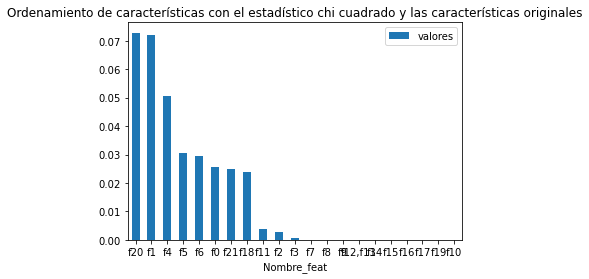

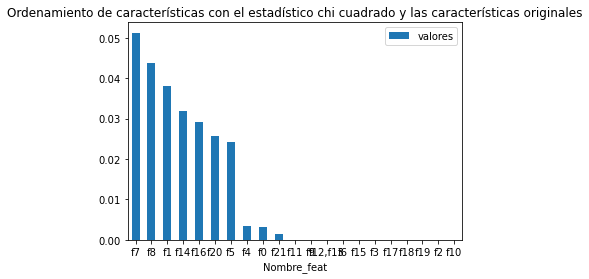

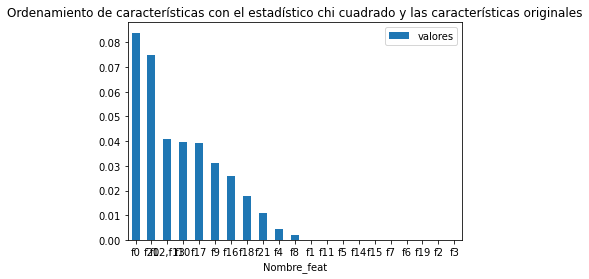

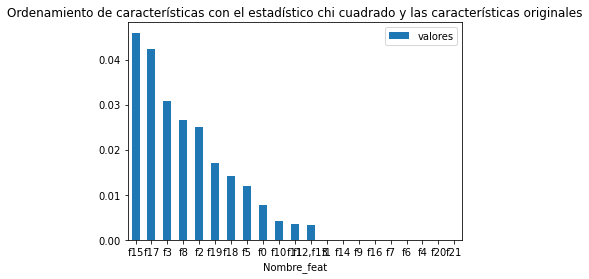

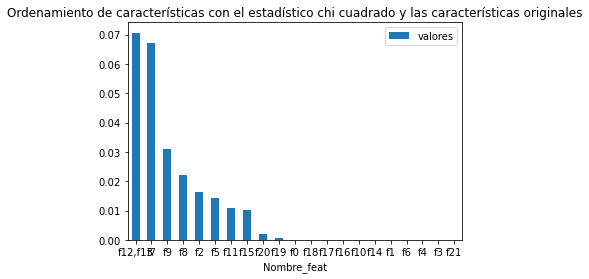

In [69]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = chisquare(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

## Selección de características. Métodos embedded

In [70]:
from matplotlib import pyplot
def embedded(X_train, X_test, Y_train, Y_test, data_input_new):
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,6)}
    profundidad_grid = np.array(range(1,6))


    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    grid_arbol_clasif.get_params()

    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
    importance_arbol = modelo_arbol_clasif.feature_importances_
    pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
    pyplot.show()

    # 5. Se representa gráficamente el modelo de clasificación
    from sklearn.tree import export_graphviz
    #from sklearn.externals.six import StringIO  
    from six import StringIO
    from IPython.display import Image  
    import pydotplus

    dot_data = StringIO()
    export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = data_input_new.columns[0:],class_names=['y-diab','n-diab'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('Tree_Clasif_all.png')
    Image(graph.create_png())

(160, 21) (160,) (41, 21) (41,)
{'max_depth': 4}


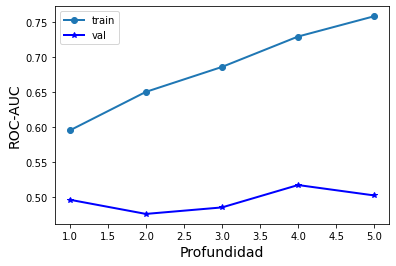

Mejor ROC-AUC en validación cruzada: 0.518
Mejor valor del hiperparámetro: {'max_depth': 4}


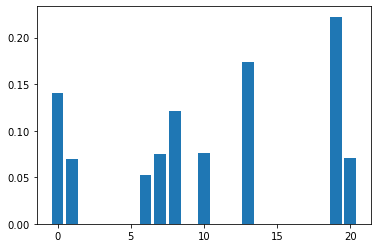

(160, 21) (160,) (41, 21) (41,)
{'max_depth': 2}


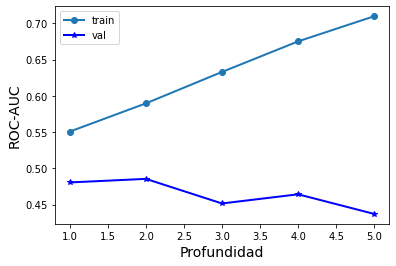

Mejor ROC-AUC en validación cruzada: 0.485
Mejor valor del hiperparámetro: {'max_depth': 2}


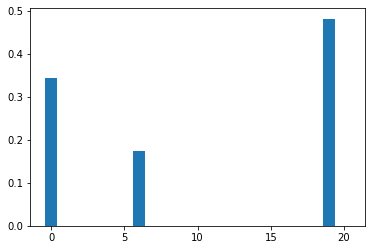

(160, 21) (160,) (41, 21) (41,)
{'max_depth': 1}


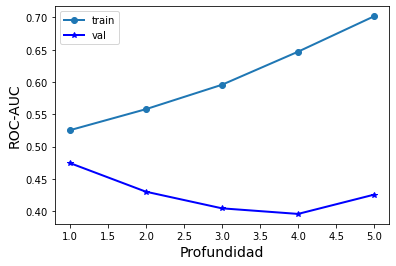

Mejor ROC-AUC en validación cruzada: 0.475
Mejor valor del hiperparámetro: {'max_depth': 1}


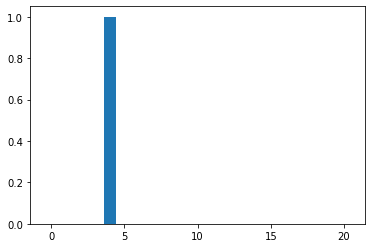

(160, 21) (160,) (41, 21) (41,)
{'max_depth': 3}


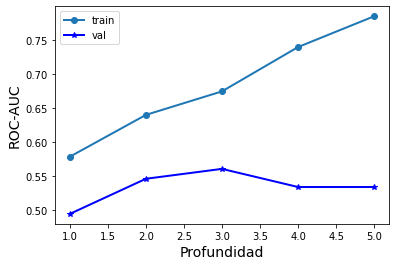

Mejor ROC-AUC en validación cruzada: 0.560
Mejor valor del hiperparámetro: {'max_depth': 3}


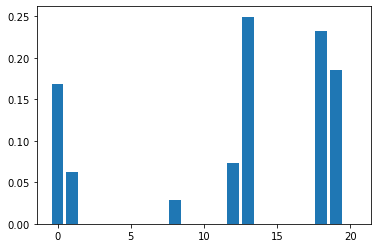

(160, 21) (160,) (41, 21) (41,)
{'max_depth': 1}


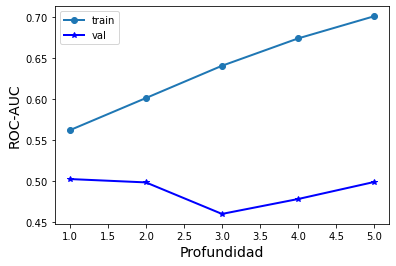

Mejor ROC-AUC en validación cruzada: 0.502
Mejor valor del hiperparámetro: {'max_depth': 1}


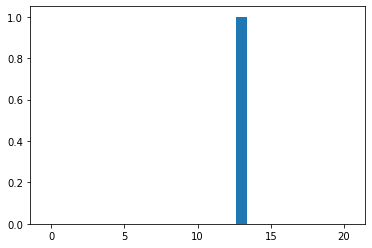

[None, None, None, None, None]


In [71]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = embedded(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

# Boostrap

In [72]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv('df_var_importance_boostrap_{}.csv'.format(generic_name))


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [73]:
df_data = data.rename(columns = {"BCaseControlStatus":"label"})
df_data.head()

,Gender,Ethnicity,Race,label,EduLevel_11th Grade,EduLevel_12th Grade - no diploma,EduLevel_7th or 8th Grade,EduLevel_9th Grade,EduLevel_Associate Degree,EduLevel_Bachelor's Degree,...,EduLevel_Master's Degree,EduLevel_Professional Degree,EduLevel_Some college but no degree,AnnualInc_$100,AnnualInc_$200,AnnualInc_$25,AnnualInc_$35,AnnualInc_$50,AnnualInc_$75,AnnualInc_Less than $25
0,0,0,0,Case,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,Control,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,Case,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,Control,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,Case,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
data_new2 = df_data.replace("Case",1).replace("Control",0)

In [ ]:
compute_boostrap(data_new2, data_input.columns, 'label', 'importance_bootstrap', flag_save_importance=True)

# Métodos con las características más importantes


In [76]:
data_input_FS = data_input[["Gender", "AnnualInc_$75", "EduLevel_Bachelor's Degree"]]
data_input_FS2 = data_input[["Gender", "AnnualInc_$75", "EduLevel_Bachelor's Degree", "AnnualInc_$100"]]
data_input_FS3 = data_input[["Gender", "AnnualInc_$50", "Ethnicity",  "AnnualInc_$75", "EduLevel_Bachelor's Degree", "AnnualInc_$100"]]

In [77]:
#importamos para posteriormente ser utilizado en la combinación de las encuestas
data_input_FS.to_excel("BDemoLifeFS.xlsx")

# KNN

In [95]:
model_FS   =[]
mean_FS = []
std_FS = []

model_FS1= []
mean_FS1 = []
std_FS1= []

(160, 3) (160,) (41, 3) (41,)


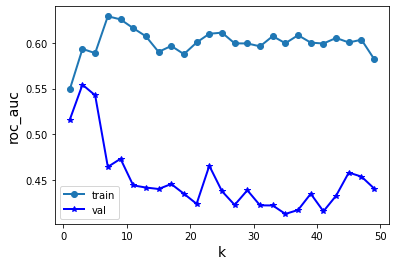

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.554
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.5121951219512195
[[ 9 11]
 [ 9 12]]
Sensibilidad y Accuracy 0.5714285714285714 0.5121951219512195


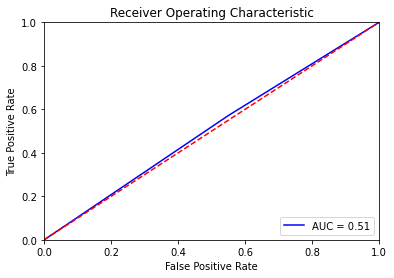

(160, 3) (160,) (41, 3) (41,)


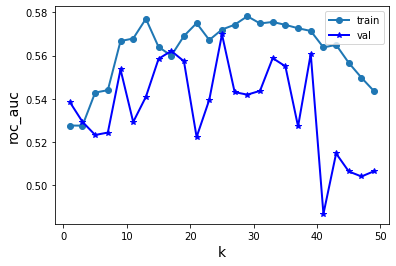

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.570
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}
0.5365853658536586
[[ 1 19]
 [ 0 21]]
Sensibilidad y Accuracy 1.0 0.5365853658536586


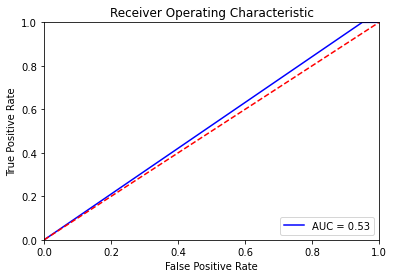

(160, 3) (160,) (41, 3) (41,)


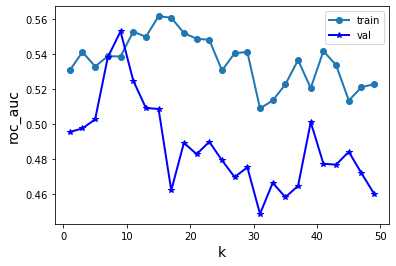

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.553
Valor correspondiente para el hiperparámetro: {'n_neighbors': 9}
0.5121951219512195
[[ 6 14]
 [ 6 15]]
Sensibilidad y Accuracy 0.7142857142857143 0.5121951219512195


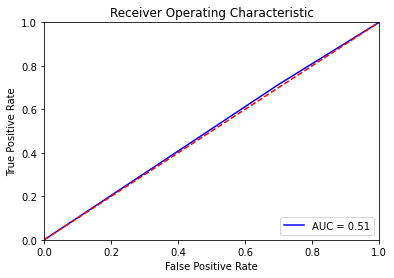

(160, 3) (160,) (41, 3) (41,)


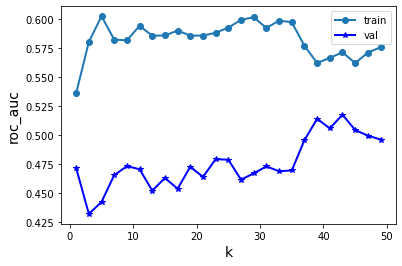

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.517
Valor correspondiente para el hiperparámetro: {'n_neighbors': 43}
0.5121951219512195
[[ 2 18]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.5121951219512195


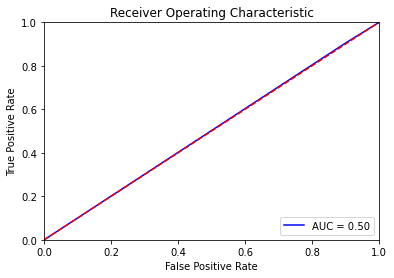

(160, 3) (160,) (41, 3) (41,)


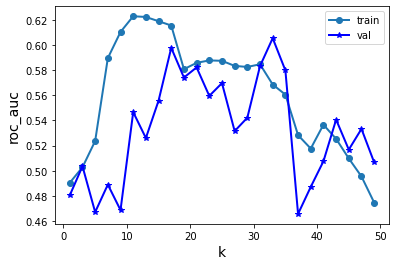

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.605
Valor correspondiente para el hiperparámetro: {'n_neighbors': 33}
0.36585365853658536
[[10 10]
 [16  5]]
Sensibilidad y Accuracy 0.23809523809523808 0.36585365853658536


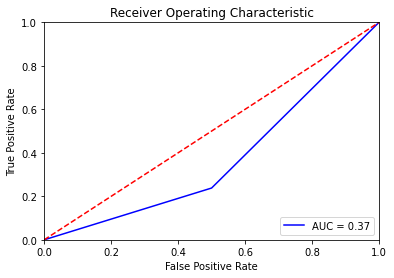

[0.5714285714285714, 1.0, 0.7142857142857143, 0.9047619047619048, 0.23809523809523808] [0.5121951219512195, 0.5365853658536586, 0.5121951219512195, 0.5121951219512195, 0.36585365853658536] [0.5107142857142857, 0.525, 0.5071428571428571, 0.5023809523809524, 0.36904761904761907]


In [96]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])



print(sensi, accuracy, roc)

In [97]:
import statistics
media_FS = statistics.mean(accuracy) # 7
desviacion_estandar_FS = statistics.stdev(accuracy) # 5.164...

model_FS.append("KNN")
mean_FS.append(media_FS)
std_FS.append(desviacion_estandar_FS)

In [98]:
print(media_FS, desviacion_estandar_FS)

media_FS1 = statistics.mean(roc) # 7
desviacion_estandar_FS1 = statistics.stdev(roc) # 5.164...
print(media_FS1, desviacion_estandar_FS1)

model_FS1.append("KNN")
mean_FS1.append(media_FS1)
std_FS1.append(desviacion_estandar_FS1)

media_FS2 = statistics.mean(sensi) # 7
desviacion_estandar_FS2 = statistics.stdev(sensi) # 5.164...
print(media_FS2, desviacion_estandar_FS2)


media_FS3 = statistics.mean(espe) # 7
desviacion_estandar_FS3 = statistics.stdev(espe) # 5.164...
print(media_FS3, desviacion_estandar_FS3)

0.4878048780487805 0.06898602743283391
0.4828571428571429 0.0641787028202628
0.6857142857142857 0.3004154342016668
0.6857142857142857 0.3004154342016668


# SVC 

(160, 4) (160,) (41, 4) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.580
0.4878048780487805
[[ 0 20]
 [ 1 20]]
Sensibilidad y Accuracy 0.4878048780487805


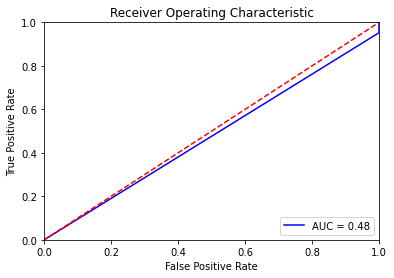

(160, 4) (160,) (41, 4) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.554
0.5365853658536586
[[ 2 18]
 [ 1 20]]
Sensibilidad y Accuracy 0.5365853658536586


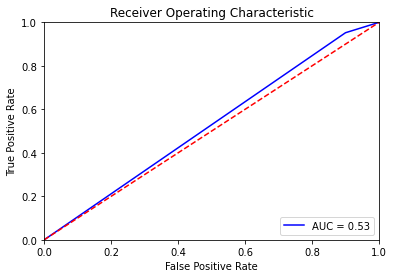

(160, 4) (160,) (41, 4) (41,)
Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.479
0.6097560975609756
[[19  1]
 [15  6]]
Sensibilidad y Accuracy 0.6097560975609756


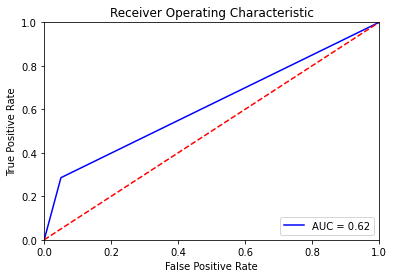

(160, 4) (160,) (41, 4) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
0.4878048780487805
[[14  6]
 [15  6]]
Sensibilidad y Accuracy 0.4878048780487805


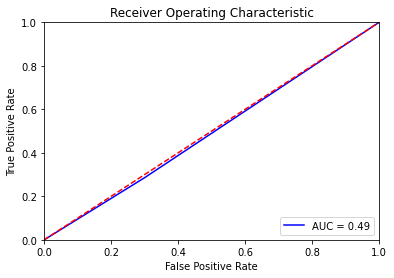

(160, 4) (160,) (41, 4) (41,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.548
0.4634146341463415
[[12  8]
 [14  7]]
Sensibilidad y Accuracy 0.4634146341463415


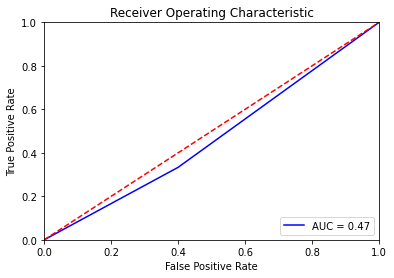

In [99]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS2, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [100]:
import statistics
media_svc_FS = statistics.mean(accuracy) # 7
desviacion_svc_FS = statistics.stdev(accuracy) # 5.164...
print(media_svc_FS, desviacion_svc_FS)

model_FS.append("SVM")
mean_FS.append(media_svc_FS)
std_FS.append(desviacion_svc_FS)

media_svc_FS1 = statistics.mean(roc) # 7
desviacion_svc_FS1 = statistics.stdev(roc) # 5.164...
print(media_svc_FS1, desviacion_svc_FS1)

model_FS1.append("SVM")
mean_FS1.append(media_svc_FS1)
std_FS1.append(desviacion_svc_FS1)

media_svc_FS2 = statistics.mean(sensi) # 7
desviacion_svc_FS2 = statistics.stdev(sensi) # 5.164...
print(media_svc_FS2, desviacion_svc_FS2)


media_FS3 = statistics.mean(espe) # 7
desviacion_estandar_FS3 = statistics.stdev(espe) # 5.164...
print(media_FS3, desviacion_estandar_FS3)


0.5159523809523809 0.06130432247932053
0.5619047619047619 0.3569840916950726
0.5170731707317073 0.058230909201528396
0.47 0.40558599581346494


# Decision Tree

(160, 3) (160,) (41, 3) (41,)
     Gender  AnnualInc_$75  EduLevel_Bachelor's Degree
26        1              0                           0
1         1              0                           0
162       0              0                           0
25        1              0                           0
94        0              0                           0
..      ...            ...                         ...
53        0              0                           1
115       1              0                           0
178       0              0                           1
99        0              0                           0
119       0              0                           0

[160 rows x 3 columns]
{'max_depth': 1}


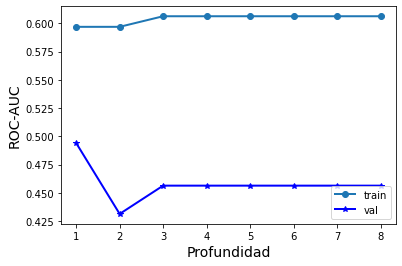

Mejor ROC-AUC en validación cruzada: 0.494
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4634146341463415
[[ 1 19]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.4634146341463415


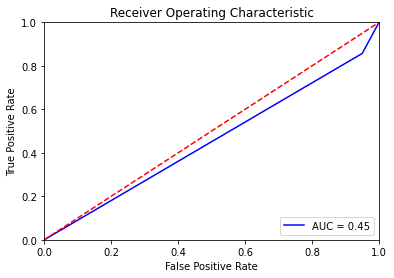

(160, 3) (160,) (41, 3) (41,)
     Gender  AnnualInc_$75  EduLevel_Bachelor's Degree
150       0              0                           0
197       0              0                           0
58        1              0                           1
161       0              1                           1
86        1              0                           0
..      ...            ...                         ...
107       0              0                           0
49        0              0                           1
114       1              0                           1
128       1              0                           1
50        1              0                           0

[160 rows x 3 columns]
{'max_depth': 3}


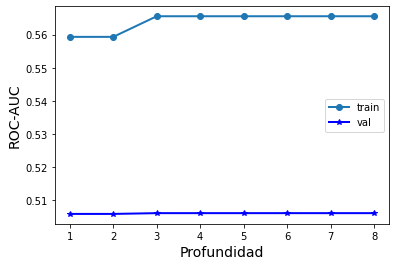

Mejor ROC-AUC en validación cruzada: 0.506
Mejor valor del hiperparámetro: {'max_depth': 3}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5365853658536586
[[ 4 16]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.5365853658536586


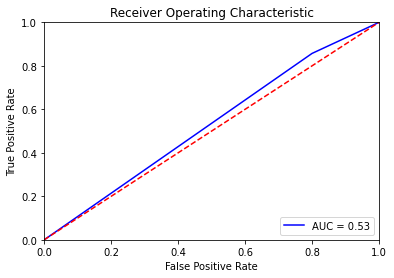

(160, 3) (160,) (41, 3) (41,)
     Gender  AnnualInc_$75  EduLevel_Bachelor's Degree
131       0              0                           1
30        0              0                           0
168       0              0                           1
154       1              0                           0
28        1              0                           0
..      ...            ...                         ...
46        1              0                           0
5         1              0                           0
58        1              0                           1
151       1              0                           0
183       1              0                           0

[160 rows x 3 columns]
{'max_depth': 2}


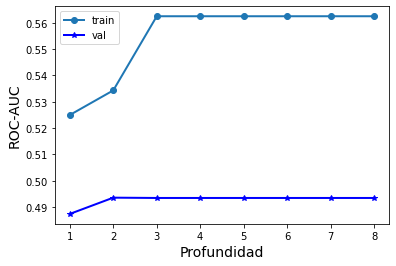

Mejor ROC-AUC en validación cruzada: 0.494
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.3902439024390244
[[10 10]
 [15  6]]
Sensibilidad y Accuracy 0.2857142857142857 0.3902439024390244


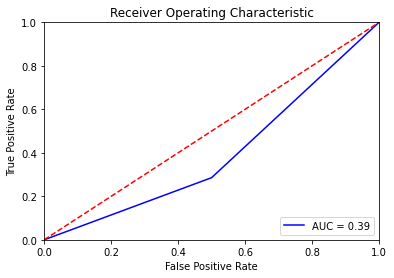

(160, 3) (160,) (41, 3) (41,)
     Gender  AnnualInc_$75  EduLevel_Bachelor's Degree
77        0              0                           0
147       0              0                           0
51        0              1                           0
157       0              0                           1
65        1              1                           0
..      ...            ...                         ...
74        0              0                           1
120       0              0                           0
191       1              0                           1
164       0              0                           1
57        1              0                           0

[160 rows x 3 columns]
{'max_depth': 1}


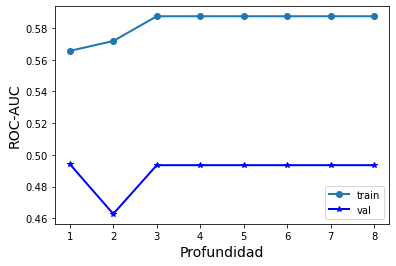

Mejor ROC-AUC en validación cruzada: 0.494
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4878048780487805
[[ 2 18]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.4878048780487805


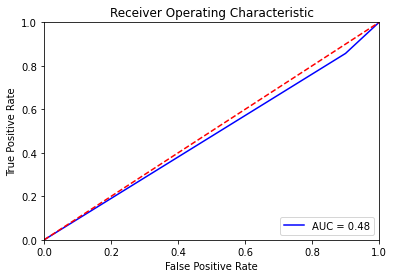

(160, 3) (160,) (41, 3) (41,)
     Gender  AnnualInc_$75  EduLevel_Bachelor's Degree
54        0              0                           1
28        1              0                           0
25        1              0                           0
21        1              1                           0
24        0              0                           1
..      ...            ...                         ...
130       0              1                           0
146       0              0                           0
29        1              0                           0
43        1              1                           0
92        1              0                           0

[160 rows x 3 columns]
{'max_depth': 3}


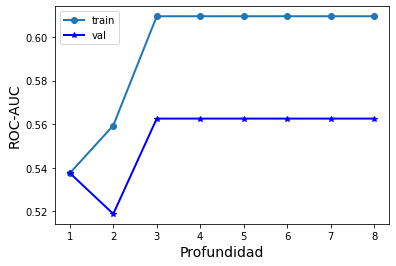

Mejor ROC-AUC en validación cruzada: 0.563
Mejor valor del hiperparámetro: {'max_depth': 3}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.3170731707317073
[[ 7 13]
 [15  6]]
Sensibilidad y Accuracy 0.2857142857142857 0.3170731707317073


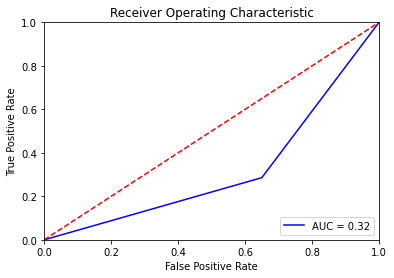

In [101]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [102]:
media_sen_logarit_FS = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit_FS = statistics.stdev(accuracy) # 5.164...


model_FS.append("DT")
mean_FS.append(media_sen_logarit_FS)

std_FS.append(desviacion_estandar_sen_logarit_FS)



In [103]:
print(media_sen_logarit_FS, desviacion_estandar_sen_logarit_FS)
media_sen_FS1 = statistics.mean(roc) # 7
desviacion_sen_FS1 = statistics.stdev(roc) # 5.164...
print(media_sen_FS1, desviacion_sen_FS1)
model_FS1.append("DT")
mean_FS1.append(media_sen_FS1)

std_FS1.append(desviacion_sen_FS1)

media_sen_FS2 = statistics.mean(sensi) # 7
desviacion_sen_FS2 = statistics.stdev(sensi) # 5.164...
print(media_sen_FS2, desviacion_svc_FS2)


media_FS3 = statistics.mean(espe) # 7
desviacion_estandar_FS3 = statistics.stdev(espe) # 5.164...
print(media_FS3, desviacion_estandar_FS3)

0.43902439024390244 0.08623253429104238
0.4342857142857143 0.08138626720642692
0.6285714285714286 0.058230909201528396
0.24 0.18506755523321747


# Regresión logística

# Reg. Logística Lasso

(160, 3) (160,) (41, 3) (41,)
{'C': 5}
0.53125
[[ 7 13]
 [12  9]]
tn: 7, fp:13, fn:12, tp:9
Accuracy: 0.3902439024390244
              precision    recall  f1-score   support

Non-diabetic       0.37      0.35      0.36        20
    Diabetic       0.41      0.43      0.42        21

    accuracy                           0.39        41
   macro avg       0.39      0.39      0.39        41
weighted avg       0.39      0.39      0.39        41

Sensibilidad: 0.42857142857142855


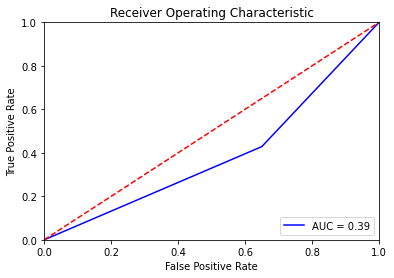

(160, 3) (160,) (41, 3) (41,)
{'C': 5}
0.5125
[[ 4 16]
 [ 5 16]]
tn: 4, fp:16, fn:5, tp:16
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.44      0.20      0.28        20
    Diabetic       0.50      0.76      0.60        21

    accuracy                           0.49        41
   macro avg       0.47      0.48      0.44        41
weighted avg       0.47      0.49      0.44        41

Sensibilidad: 0.7619047619047619


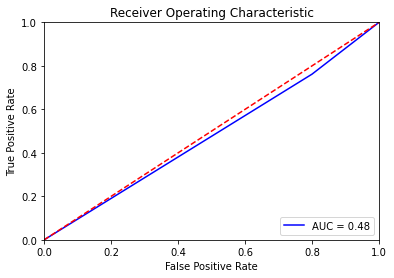

(160, 3) (160,) (41, 3) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


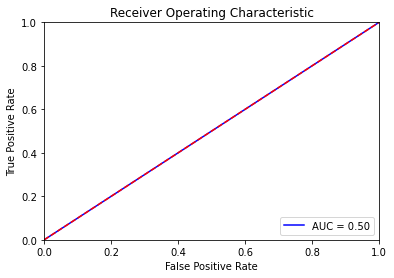

(160, 3) (160,) (41, 3) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


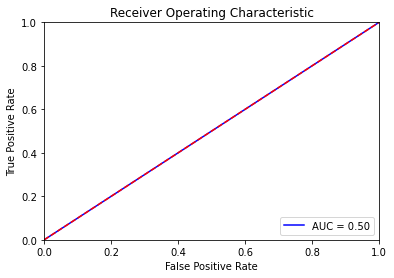

(160, 3) (160,) (41, 3) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


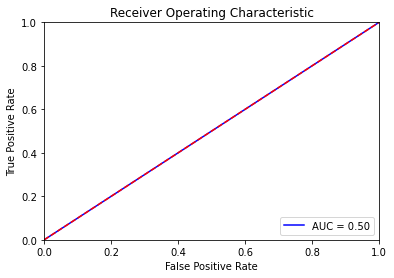

In [104]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [105]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model_FS.append("LASSO")
mean_FS.append(media_lasso)
std_FS.append(desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...


model_FS1.append("LASSO")
mean_FS1.append(media_lasso2)
std_FS1.append(desviacion_estandar_lasso2)


model2.append("LASSO")
mean2.append(media_lasso2)
std2.append(desviacion_estandar_lasso2)

In [106]:
print(media_lasso, desviacion_estandar_lasso)
print(media_lasso2, desviacion_estandar_lasso2)
media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) 
print(media_lasso3, desviacion_estandar_lasso3)


media_FS3 = statistics.mean(espe) # 7
desviacion_estandar_FS3 = statistics.stdev(espe) # 5.164...
print(media_FS3, desviacion_estandar_FS3)

0.46829268292682924 0.04363059468292271
0.47404761904761905 0.04809582743627606
0.23809523809523808 0.34667189948954846
0.71 0.4006245124802026


In [107]:
def plot_mean_std_metric(df_metrics, lims, metric_name='', title_figure='', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()


In [108]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model_FS
df_metrics["mean"] = mean_FS
df_metrics["std"] = std_FS

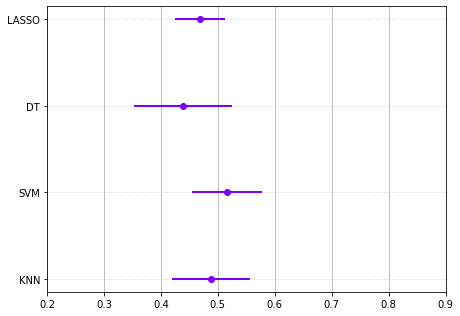

In [109]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)
